# data pre processing using best 1 and best 2 image

In [1]:
import pandas as pd
# Load labels from CSV
csv_file_path = './image_Selection_Implant_Marking_small_data.csv'
filtered_df = pd.read_csv(csv_file_path)

# Folder waise active lerning base on bast1 and bast2 image

In [2]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
for i in filtered_df.index.tolist():
    file_name=filtered_df.loc[i,'FileName']
    bast1=filtered_df.loc[i,'best1']
    bast2=filtered_df.loc[i,'best2']
# Folder containing images for active learning
    image_folder = f'./Linear_Scaling/Linear_Scaling/{file_name}/'  # Replace with your image folder
    output_folder = f'Linear_Scaling_classified_data1/{file_name}'  # Replace with your output folder
    for j in range(2):

        # if filtered_df.loc[i,'Label']==1:
        #     output_folder=f'./Linear_Scaling_classified_data/implante/'
        # else:
        #     output_folder=f'./Linear_Scaling_classified_data/unimplante/'
        #User provides the path to the "best" image
        best_image_path=""
        if j%2==0:
            best_image_path = f'./Linear_Scaling/Linear_Scaling/{file_name}/{bast1}.png' 
        else: 
            best_image_path = f'./Linear_Scaling/Linear_Scaling/{file_name}/{bast2}.png'

        # Initialize lists to store labeled and unlabeled data
        X_labeled = []  # Labeled images
        y_labeled = []  # Corresponding labels
        X_unlabeled = []  # Unlabeled images

        # Load and preprocess images from the image folder
        for image_file in os.listdir(image_folder):
            if image_file.endswith(('.jpg', '.png')):
                image_path = os.path.join(image_folder, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:  # Ensure a valid image is loaded
                    label = -1  # Initialize as unlabeled
                    X_unlabeled.append(image.flatten())  # Flatten the image data

        # Convert lists to NumPy arrays
        X_unlabeled = np.array(X_unlabeled)


        # Load the best image and mark it as labeled
        best_image = cv2.imread(best_image_path, cv2.IMREAD_GRAYSCALE)
        if best_image is not None:  # Ensure a valid image is loaded
            X_labeled.append(best_image.flatten())  # Flatten the image data
            y_labeled.append(1)  # 1 indicates the best image label

        # Initialize the model
        model = RandomForestClassifier(n_estimators=100, random_state=42)

        # Train the initial model with the labeled data
        model.fit(X_labeled, y_labeled)

        # Calculate similarity (mean squared difference) with the selected image
        def calculate_similarity(image1, image2):
            return np.mean((image1 - image2) ** 2)

        # Set a threshold for considering images as similar
        similarity_threshold = 57  # Adjust as needed

        # Create a folder for similar images
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Find and save similar images with the same names as the input images
        for idx, image in enumerate(X_unlabeled):
            similarity = calculate_similarity(best_image.flatten(), image)
            if similarity < similarity_threshold:
                input_image_name = os.listdir(image_folder)[idx]
                similar_image_path = os.path.join(output_folder, f'{file_name}_{input_image_name}')
                cv2.imwrite(similar_image_path, image.reshape(best_image.shape))  # Reshape the flattened image to match the original dimensions

        # Train the final model with all available labeled data (not shown in this example)

# convert the implant image 45 degree angle and file name are sortd in new csv

In [17]:
import os
import pandas as pd
from PIL import Image

# Function to rotate and save images
def rotate_and_save_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    rotated_file_names = []  # To store the new file names

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_path = os.path.join(input_folder, filename)
            
            try:
                img = Image.open(image_path)
                rotated_img = img.rotate(45)
                if not os.path.exists(output_folder):
                    os.makedirs(output_folder)
                # Create a new file name and save the rotated image
                rotated_file_name = f"rotated_45_{filename}"
                rotated_file_names.append(rotated_file_name)
                output_path = os.path.join(output_folder, rotated_file_name)
                rotated_img.save(output_path)

            except OSError as e:
                print(f"Skipping {filename} due to error: {e}")


# Read folder names from CSV
csv_file_path = './image_Selection_Implant_Marking_small_data.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)
df=df.drop(['PatientID','best1','best2'],axis=1)
# Iterate through each folder and rotate images
all_rotated_file_names = []
for i in df.index.tolist():
   
    if df.loc[i,'Label']==1:
        folder_name=df.loc[i,'FileName']
        input_folder_path = os.path.join('./Linear_Scaling_classified_data1/', folder_name)  # Replace 'input_folder' with your actual input folder path
        output_folder_path = os.path.join(f'./Linear_Scaling_classified_data1/', f'rotated_45_{folder_name}')  # Replace 'output_folder' with your desired output folder path
        rotate_and_save_images(input_folder_path, output_folder_path)
        new_row = {'FileName': f'rotated_45_{folder_name}', 'Label': 1}
        new_df = pd.DataFrame([new_row])
        df = pd.concat([df, new_df], ignore_index=True)
df.to_csv('with_rotated_folders_names.csv', index=False)


# convert the implant image 315 degree angle and file name are sortd in new csv

In [32]:
import os
import pandas as pd
from PIL import Image

# Function to rotate and save images
def rotate_and_save_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    rotated_file_names = []  # To store the new file names

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_path = os.path.join(input_folder, filename)
            
            try:
                img = Image.open(image_path)
                rotated_img = img.rotate(315)
                if not os.path.exists(output_folder):
                    os.makedirs(output_folder)
                # Create a new file name and save the rotated image
                rotated_file_name = f"rotated_315_{filename}"
                rotated_file_names.append(rotated_file_name)
                output_path = os.path.join(output_folder, rotated_file_name)
                rotated_img.save(output_path)

            except OSError as e:
                print(f"Skipping {filename} due to error: {e}")


# Read folder names from CSV
csv_file_path = './image_Selection_Implant_Marking_small_data.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file_path)
with_rotated=pd.read_csv('./with_rotated_folders_names.csv')
df=df.drop(['PatientID','best1','best2'],axis=1)
# Iterate through each folder and rotate images
all_rotated_file_names = []
for i in df.index.tolist():
   
    if df.loc[i,'Label']==1:
        folder_name=df.loc[i,'FileName']
        input_folder_path = os.path.join('./Linear_Scaling_classified_data1/', folder_name)  # Replace 'input_folder' with your actual input folder path
        output_folder_path = os.path.join(f'./Linear_Scaling_classified_data1/', f'rotated_315_{folder_name}')  # Replace 'output_folder' with your desired output folder path
        rotate_and_save_images(input_folder_path, output_folder_path)
        new_row = {'FileName': f'rotated_315_{folder_name}', 'Label': 1}
        new_df = pd.DataFrame([new_row])
        with_rotated = pd.concat([with_rotated, new_df], ignore_index=True)
with_rotated.to_csv('with_rotated_folders_names.csv', index=False)


In [19]:
import pandas as pd
# Load labels from CSV
csv_file_path = './with_rotated_folders_names.csv'
labels_df = pd.read_csv(csv_file_path)


# map all image and save in a new csv

In [21]:
import os

def find_images_with_prefix(directory, prefix):
    """
    Find all images in a directory with filenames starting with a specific prefix.

    Parameters:
    - directory: The directory containing the images.
    - prefix: The desired prefix for the filenames.

    Returns:
    - List of image filenames with the specified prefix.
    """
    image_filenames = []
    for filename in os.listdir(directory):
        if filename.startswith(prefix):
            image_filenames.append(f'{directory}/{filename}')
    return image_filenames
image_label_mapping = {}
# Example usage:

for i in labels_df.index.tolist():
    prefix = labels_df.loc[i,'FileName'] # Replace with your desired prefix
    directory = f'./Linear_Scaling_classified_data1/{prefix}'
    image_filenames = find_images_with_prefix(directory, prefix)
  
    for filename in image_filenames:
        image_label_mapping[filename] = labels_df.loc[i, 'Label']

# Convert the mapping to a DataFrame
mapping_df = pd.DataFrame(list(image_label_mapping.items()), columns=['Image Filename', 'Label'])

# Save the mapping to a new CSV file
mapping_csv_path = 'image_to_mapping.csv'  # Specify the desired path for the new CSV file
mapping_df.to_csv(mapping_csv_path, index=False)


# Train data using InceptionV3

In [30]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

csv_file_path = './image_to_mapping.csv'
labels_df = pd.read_csv(csv_file_path)

# Define the image directory
image_dir = ''


# Define the image size and batch size
image_size = (299, 299)
batch_size = 32

# Create data generators
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Extract image filenames and labels
# labels_df['full_image_filename'] = image_dir + os.path.sep + labels_df['Image Filename'].astype(str)
labels_df['full_image_filename'] = labels_df['Image Filename'].astype(str)
labels_df['label'] = labels_df['Label'].astype(str)  # Convert labels to string for binary class_mode

# Split data into training and validation sets
train_data = data_generator.flow_from_dataframe(dataframe=labels_df, x_col='full_image_filename', y_col='label', target_size=image_size, batch_size=batch_size, class_mode='binary', subset='training')
valid_data = data_generator.flow_from_dataframe(dataframe=labels_df, x_col='full_image_filename', y_col='label', target_size=image_size, batch_size=batch_size, class_mode='binary', subset='validation')

# Load InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, epochs=5, validation_data=valid_data)

# Evaluate the model
predictions = model.predict(valid_data)
y_true = valid_data.labels  # Use labels directly from the generator
y_pred = (predictions > 0.5).astype(int).flatten()

# Compute metrics
confusion_matrix_result = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:\n", confusion_matrix_result)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Found 1248 validated image filenames belonging to 2 classes.
Found 312 validated image filenames belonging to 2 classes.
Epoch 1/5
39/39 [==============================] - 124s 3s/step - loss: 0.0979 - accuracy: 0.9543 - val_loss: 0.9704 - val_accuracy: 0.9583
Epoch 2/5
39/39 [==============================] - 119s 3s/step - loss: 0.0788 - accuracy: 0.9816 - val_loss: 15.4239 - val_accuracy: 0.9583
Epoch 3/5
39/39 [==============================] - 119s 3s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.9767 - val_accuracy: 0.9391
Epoch 4/5
39/39 [==============================] - 118s 3s/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 9.0622 - val_accuracy: 0.0417
Epoch 5/5
10/10 [==============================] - 5s 475ms/step
Confusion Matrix:
 [[ 30 269]
 [  2  11]]
Accuracy: 0.13141025641025642
Precision: 0.039285714285714285
Recall: 0.8461538461538461
F1 Score: 0.07508532423208192


# for gpu setup
https://ipg-automotive.com/en/support/support-request/faq/how-to-set-up-the-gpu-coding-interface-with-visual-studio-code-250/

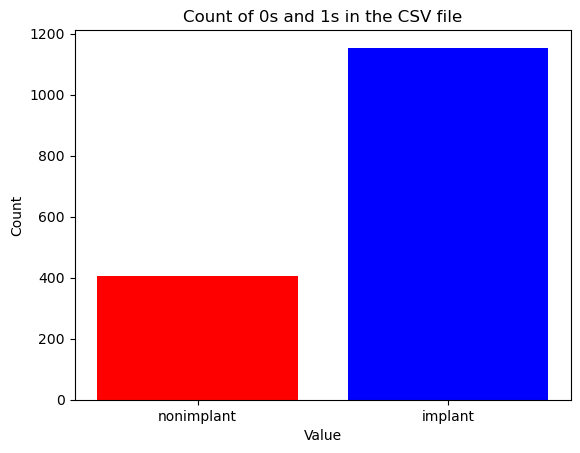

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
csv_file_path = './image_to_mapping.csv'
df = pd.read_csv(csv_file_path)

count_0 = df[df['Label'] == 0].shape[0]  # Replace 'your_column_name' with the actual column name
count_1 = df[df['Label'] == 1].shape[0]

# Plot the results
labels = ['nonimplant', 'implant']
counts = [count_0, count_1]

plt.bar(labels, counts, color=['red', 'blue'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in the CSV file')
plt.show()